## Telecom Churn Case Study

#### Business Problem :
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

#### Business Objective : 
To analyse telecom industry data and predict high value customers who are at high risk of churn and identify main indicators of churn

In [1]:
# import the important libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings("ignore")

### Step 1  : Import and Inspect  the data 

In [2]:
df = pd.read_csv('telecom_churn_data.csv')

In [3]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [5]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [6]:
df.shape

(99999, 226)

In [7]:
df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

### Step 2 :  Create the dependent variable i.e Churn

### What is Churn?
Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. In our analysis we are concentrating on high value customers, as approximately 80% of revenue comes from the top 20% customers. Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

We have been given dataset that constitute 3 phases :

1. Months 6 and 7 : Good Phase 
In this phase customers are generally happy with the plans and satisified with the service

2. Month 8: Action Phase
Here, the customers are not satified with the service or they  might be getting better offer from the competitiors. It is important to implement corrective axctions during this phase to avoid churn.

3. Month 9 : Churn Phase
In this phase, customers have churned and moved to other telecom operator.


##### Identify the high value customers. 

High value customers are those who have recharged with am amount greater than the 70th percentile of the average recharge amount in the first two months (the good phase).

After identifying high value customers, we will tag churn customers based on those who have not made any calls (either incoming or outgoing) and have not used mobile internet even once in the churn phase.

In [8]:
# Identify the high value customers
df['total_data_rech_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']
df['total_data_rech_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']

df['amt_data_6'] = df[['total_rech_amt_6','total_data_rech_6']].sum(axis=1)
df['amt_data_7'] = df[['total_rech_amt_7','total_data_rech_7']].sum(axis=1)

df['AVG_amt_data_6_7'] = df[['amt_data_6','amt_data_7']].mean(axis=1)

In [9]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,AVG_amt_data_6_7
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,N

As per the definition of high value customers are those whose recharge amount should be more than or equal to 70th percentile.
Therefore we have considered greater than to filter high value customers

In [10]:
df_1 = df[(df['AVG_amt_data_6_7']> df['AVG_amt_data_6_7'].quantile(0.7))]
df_1.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 231 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [11]:
df_1.shape

(29953, 231)

In [12]:
# Identify the churned customers based on the 9th month (Churn Base)
df_1['churn_flag'] = np.where(((df_1['total_ic_mou_9'] == 0.00) & (df_1['total_og_mou_9'] == 0.00))
                            & ((df_1['vol_2g_mb_9'] == 0.00) & (df_1['vol_3g_mb_9'] == 0.00)), 1, 0)

In [13]:
print(df_1['churn_flag'].value_counts())

0    27520
1     2433
Name: churn_flag, dtype: int64


In [14]:
print ([df_1['churn_flag'].value_counts(normalize = True)])

[0    0.918773
1    0.081227
Name: churn_flag, dtype: float64]


In [15]:
# delete variables created to filter high-value customers
df_1 = df_1.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'AVG_amt_data_6_7'], axis=1)
df_1.shape

(29953, 227)

#### Thus the Churn rate is 8%. Further we notice that the data is highly imbalanced.

Let's drop all features related to churn phase i.e. 9th month

In [16]:
drop_fourth_month_columns = [x for x in list(df_1) if x.endswith("_9")]
drop_fourth_month_columns += ["sep_vbc_3g"]
drop_fourth_month_columns 


['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [17]:
df_1.drop(drop_fourth_month_columns, axis=1, inplace=True)


In [18]:
df_1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 172 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   arpu_6                    float64
 9   arpu_7                    float64
 10  arpu_8                    float64
 11  onnet_mou_6               float64
 12  onnet_mou_7               float64
 13  onnet_mou_8               float64
 14  offnet_mou_6              float64
 15  offnet_mou_7              float64
 16  offnet_mou_8              float64
 17  roam_ic_mou_6             float64
 18  roam_ic_mou_7             float64
 19  roam_ic_mou_8             float64
 20  roam_og_mou_6             f

In [19]:
df_1.shape

(29953, 172)

### Step 3 :  Checking and Handling Missing Values

In [20]:
df_1.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou                223
std_og_t2o_mou                223
loc_ic_t2o_mou                223
last_date_of_month_6            0
last_date_of_month_7           27
last_date_of_month_8          165
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                   542
onnet_mou_7                   536
onnet_mou_8                  1172
offnet_mou_6                  542
offnet_mou_7                  536
offnet_mou_8                 1172
roam_ic_mou_6                 542
roam_ic_mou_7                 536
roam_ic_mou_8                1172
roam_og_mou_6                 542
roam_og_mou_7                 536
roam_og_mou_8                1172
loc_og_t2t_mou_6              542
loc_og_t2t_mou_7              536
loc_og_t2t_mou_8             1172
loc_og_t2m_mou_6              542
loc_og_t2m_mou_7              536
loc_og_t2m_mou_8             1172
loc_og_t2f_mou

In [21]:
df_1.isnull().sum()*100/df_1.shape[0]

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.744500
std_og_t2o_mou               0.744500
loc_ic_t2o_mou               0.744500
last_date_of_month_6         0.000000
last_date_of_month_7         0.090141
last_date_of_month_8         0.550863
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  1.809502
onnet_mou_7                  1.789470
onnet_mou_8                  3.912797
offnet_mou_6                 1.809502
offnet_mou_7                 1.789470
offnet_mou_8                 3.912797
roam_ic_mou_6                1.809502
roam_ic_mou_7                1.789470
roam_ic_mou_8                3.912797
roam_og_mou_6                1.809502
roam_og_mou_7                1.789470
roam_og_mou_8                3.912797
loc_og_t2t_mou_6             1.809502
loc_og_t2t_mou_7             1.789470
loc_og_t2t_mou_8             3.912797
loc_og_t2m_m

The above analysis indicates that there are goog amount of missing values in the data set.
Lets treat them with an appropriate measure

In [22]:
# Howeevr there are certain  features with single or unique value. We can drop such variables.

Variables_Unique = pd.DataFrame(df_1.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print (Variables_Unique[Variables_Unique['nunique'] == 1])



                 feature  nunique
1              circle_id        1
2         loc_og_t2o_mou        1
3         std_og_t2o_mou        1
4         loc_ic_t2o_mou        1
5   last_date_of_month_6        1
6   last_date_of_month_7        1
7   last_date_of_month_8        1
47      std_og_t2c_mou_6        1
48      std_og_t2c_mou_7        1
49      std_og_t2c_mou_8        1
86      std_ic_t2o_mou_6        1
87      std_ic_t2o_mou_7        1
88      std_ic_t2o_mou_8        1


#### There are 13 such variables. Accordingly, we can drop them

In [23]:
df_1 = df_1.drop(columns = list(Variables_Unique[Variables_Unique['nunique'] == 1]['feature']))

In [24]:
df_1.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_flag
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0

In [25]:
df_1.shape

(29953, 159)

#### Treating the Missing values


In [26]:
df_1.isnull().sum()*100/df_1.shape[0]

mobile_number                0.000000
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  1.809502
onnet_mou_7                  1.789470
onnet_mou_8                  3.912797
offnet_mou_6                 1.809502
offnet_mou_7                 1.789470
offnet_mou_8                 3.912797
roam_ic_mou_6                1.809502
roam_ic_mou_7                1.789470
roam_ic_mou_8                3.912797
roam_og_mou_6                1.809502
roam_og_mou_7                1.789470
roam_og_mou_8                3.912797
loc_og_t2t_mou_6             1.809502
loc_og_t2t_mou_7             1.789470
loc_og_t2t_mou_8             3.912797
loc_og_t2m_mou_6             1.809502
loc_og_t2m_mou_7             1.789470
loc_og_t2m_mou_8             3.912797
loc_og_t2f_mou_6             1.809502
loc_og_t2f_mou_7             1.789470
loc_og_t2f_mou_8             3.912797
loc_og_t2c_mou_6             1.809502
loc_og_t2c_m

Following variables have missing values more than 40%.
Recharge variables : date_of_last_rech_data_6 ,total_rech_data_6,max_rech_data_6,count_rech_2g_6,av_rech_amt_data_6 and total_data_rech_6 
and variables such as arpu_3g_6,night_pck_user_6,fb_user_6 

In [27]:
## Lets us have a list of all rechange variables 

recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                 ]
df_1[recharge_cols].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,16740.000000,17038.000000,15935.000000,16740.000000,17038.000000,15935.000000,16740.000000,17038.000000,15935.000000,16740.000000,17038.000000,15935.000000,16740.000000,17038.000000,15935.000000
mean,2.987515,3.262648,3.050769,2.222162,2.458974,2.273110,0.765352,0.803674,0.777659,139.804002,140.444712,136.353373,234.003257,245.977234,229.716717
std,3.228484,3.497957,3.540332,3.006502,3.236767,3.113894,1.478287,1.618485,1.668363,118.892926,120.295284,119.571138,218.468385,221.778856,217.379834
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,123.000000,138.000000,100.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,152.000000,152.000000,152.000000,185.000000,198.000000,179.000000
75%,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,198.000000,198.000000,198.000000,296.000000,304.000000,274.000000
max,61.000000,54.000000,60.000000,42.000000,48.000000,44.000000,29.000000,35.000000,45.000000,1555.000000,1555.000000,1555.000000,7546.000000,4365.000000,4061.000000


In [28]:
# Lets as compare the date of last rechange with the total recharge data to check whether the recharge has been done or not.
df_1.total_rech_data_6.isnull()

0        False
7         True
8         True
21        True
23        True
         ...  
99981    False
99984    False
99986    False
99988     True
99997    False
Name: total_rech_data_6, Length: 29953, dtype: bool

In [29]:
df_1.date_of_last_rech_data_6.isnull()

0        False
7         True
8         True
21        True
23        True
         ...  
99981    False
99984    False
99986    False
99988     True
99997    False
Name: date_of_last_rech_data_6, Length: 29953, dtype: bool

In [30]:
df_1.loc[df_1.total_rech_data_6.isnull() & df_1.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(5)

,total_rech_data_6,date_of_last_rech_data_6
7,NaN,NaN
8,NaN,NaN
21,NaN,NaN
23,NaN,NaN
38,NaN,NaN


Thus, we can infer from the above analysis, that the minimum value for recharge amount is 1. Therefore, if there is no recharge we can fill that rows with 0 .

In [31]:
 ## All the recharge columns where we have missing values and we will impute missing values with zeroes
Zeros_Imputation = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'
       ]
# impute missing values with 0
df_1[Zeros_Imputation] = df_1[Zeros_Imputation].apply(lambda x: x.fillna(0))

### Imputation of the Missing values in Categorical Variables 

In [32]:

categories =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']          

In [33]:
df_1.night_pck_user_6.value_counts()
    

0.0    16333
1.0      407
Name: night_pck_user_6, dtype: int64

In [34]:
df_1.night_pck_user_7.value_counts()

0.0    16663
1.0      375
Name: night_pck_user_7, dtype: int64

In [35]:
df_1.night_pck_user_8.value_counts()

0.0    15594
1.0      341
Name: night_pck_user_8, dtype: int64

In [36]:
df_1.fb_user_6.value_counts()

1.0    15511
0.0     1229
Name: fb_user_6, dtype: int64

In case of categorical values, we can impute missing vakues with mode sicne it would disturb the distribution of the data . It is already skewed distribution. Therefore, we have created a new categoru in all these variables with -1 as a value.

In [37]:
df_1[categories] = df_1[categories].apply(lambda x: x.fillna(-1))

In [38]:
# Lets check again the missing values
df_1.isnull().sum()*100/df_1.shape[0]

mobile_number                0.000000
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  1.809502
onnet_mou_7                  1.789470
onnet_mou_8                  3.912797
offnet_mou_6                 1.809502
offnet_mou_7                 1.789470
offnet_mou_8                 3.912797
roam_ic_mou_6                1.809502
roam_ic_mou_7                1.789470
roam_ic_mou_8                3.912797
roam_og_mou_6                1.809502
roam_og_mou_7                1.789470
roam_og_mou_8                3.912797
loc_og_t2t_mou_6             1.809502
loc_og_t2t_mou_7             1.789470
loc_og_t2t_mou_8             3.912797
loc_og_t2m_mou_6             1.809502
loc_og_t2m_mou_7             1.789470
loc_og_t2m_mou_8             3.912797
loc_og_t2f_mou_6             1.809502
loc_og_t2f_mou_7             1.789470
loc_og_t2f_mou_8             3.912797
loc_og_t2c_mou_6             1.809502
loc_og_t2c_m

In [39]:
date_cols = [
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8'
            ]

df_1 = df_1.drop(date_cols, axis=1)
print("Shape after dropping: ", df_1.shape)

Shape after dropping:  (29953, 153)


In [40]:
pip install fancyimpute


Note: you may need to restart the kernel to use updated packages.


In [41]:
from fancyimpute import KNN
X_KNN = pd.DataFrame(KNN().fit_transform(df_1))
X_KNN.columns = df_1.columns
X_KNN.head()

Imputing row 1/29953 with 54 missing, elapsed time: 1240.628
Imputing row 101/29953 with 0 missing, elapsed time: 1241.091
Imputing row 201/29953 with 39 missing, elapsed time: 1241.346
Imputing row 301/29953 with 12 missing, elapsed time: 1241.588
Imputing row 401/29953 with 12 missing, elapsed time: 1241.790
Imputing row 501/29953 with 12 missing, elapsed time: 1242.037
Imputing row 601/29953 with 0 missing, elapsed time: 1242.271
Imputing row 701/29953 with 12 missing, elapsed time: 1242.486
Imputing row 801/29953 with 4 missing, elapsed time: 1242.711
Imputing row 901/29953 with 4 missing, elapsed time: 1242.922
Imputing row 1001/29953 with 0 missing, elapsed time: 1243.136
Imputing row 1101/29953 with 8 missing, elapsed time: 1243.386
Imputing row 1201/29953 with 0 missing, elapsed time: 1243.576
Imputing row 1301/29953 with 8 missing, elapsed time: 1243.796
Imputing row 1401/29953 with 0 missing, elapsed time: 1243.984
Imputing row 1501/29953 with 12 missing, elapsed time: 1244.1

Imputing row 13001/29953 with 4 missing, elapsed time: 1271.376
Imputing row 13101/29953 with 0 missing, elapsed time: 1271.594
Imputing row 13201/29953 with 12 missing, elapsed time: 1271.893
Imputing row 13301/29953 with 4 missing, elapsed time: 1272.177
Imputing row 13401/29953 with 0 missing, elapsed time: 1272.455
Imputing row 13501/29953 with 4 missing, elapsed time: 1272.668
Imputing row 13601/29953 with 0 missing, elapsed time: 1272.889
Imputing row 13701/29953 with 0 missing, elapsed time: 1273.107
Imputing row 13801/29953 with 0 missing, elapsed time: 1273.323
Imputing row 13901/29953 with 8 missing, elapsed time: 1273.540
Imputing row 14001/29953 with 12 missing, elapsed time: 1273.757
Imputing row 14101/29953 with 4 missing, elapsed time: 1273.991
Imputing row 14201/29953 with 0 missing, elapsed time: 1274.217
Imputing row 14301/29953 with 54 missing, elapsed time: 1274.501
Imputing row 14401/29953 with 12 missing, elapsed time: 1274.720
Imputing row 14501/29953 with 0 miss

Imputing row 25801/29953 with 0 missing, elapsed time: 1301.835
Imputing row 25901/29953 with 39 missing, elapsed time: 1302.027
Imputing row 26001/29953 with 0 missing, elapsed time: 1302.257
Imputing row 26101/29953 with 0 missing, elapsed time: 1302.469
Imputing row 26201/29953 with 0 missing, elapsed time: 1302.718
Imputing row 26301/29953 with 12 missing, elapsed time: 1302.979
Imputing row 26401/29953 with 0 missing, elapsed time: 1303.337
Imputing row 26501/29953 with 0 missing, elapsed time: 1303.673
Imputing row 26601/29953 with 8 missing, elapsed time: 1303.914
Imputing row 26701/29953 with 0 missing, elapsed time: 1304.168
Imputing row 26801/29953 with 0 missing, elapsed time: 1304.418
Imputing row 26901/29953 with 12 missing, elapsed time: 1304.670
Imputing row 27001/29953 with 0 missing, elapsed time: 1304.887
Imputing row 27101/29953 with 0 missing, elapsed time: 1305.092
Imputing row 27201/29953 with 12 missing, elapsed time: 1305.318
Imputing row 27301/29953 with 12 mis

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_flag
0,7.000843e+09,197.385,214.816,213.803,21.075765,12.977445,0.00,131.473356,116.145947,0.00,6.990546,0.00,0.00,10.758337,0.00,0.00,15.047775,8.211305,0.00,50.090923,44.599172,0.00,4.347059,2.774942,0.00,0.0,0.203817,0.00,69.499183,55.591729,0.00,4.687684,4.76614,0.00,39.592604,44.140766,0.00,11.54387,5.053515,0.00,55.828487,53.963312,0.00,15.191111,14.086091,0.00,1.626702,7.61307,0.00,0.196403,0.0,0.0,0.00,0.00,0.00,27.442664,31.129761,0.16,54.168058,53.76145,4.13,11.343106,4.535179,1.15,92.966922,89.437495,5.44,5.823917,1.72431,0.00,18.45788,17.213167,0.00,0.189362,0.00,0.00,24.47405,18.938914,0.00,0.00,0.00,5.44,0.083371,0.0,0.0,0.287333,7.625894,0.00,0.951148,0.00,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.170000,212.170000,212.170000,212.170000,212.170000,212.170000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1.0
1,7.000702e+09,1069.180,1349.850,3171.480,57.840000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,33.49,31.64,23.740000,12.59,38.06,51.390000,31.380000,40.28,308.630000,447.380000,162.28,62.130000,55.140000,53.23,0.0,0.000000,0.00,422.160000,533.910000,255.79,4.300000,23.29000,12.01,49.890000,31.760000,49.14,6.66000,20.080000,16.68,60.860000,75.140000,77.84,0.000000,0.180000,10.01,4.500000,0.00000,6.50,0.000000,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.49000,121.19,152.160000,101.460000,39.53,427.880000,355.230000,188.04,36.890000,11.83000,30.39,91.44000,126.990000,141.33,52.190000,34.24,22.21,180.54000,173.080000,193.94,626.46,558.04,428.74,0.210000,0.0,0.0,2.060000,14.530000,31.59,15.740000,15.19,15.

In [42]:

df1_cols = df_1.columns
# convert imputed numpy array to pandas dataframe
df_1 = pd.DataFrame(X_KNN, columns=df1_cols)
print(df_1.isnull().sum()*100/df_1.shape[0])

mobile_number         0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_m

In [43]:
df_1.shape

(29953, 153)

### step 3 : EDA Analysis

Text(0.5, 1.0, 'Churn status Distribution')

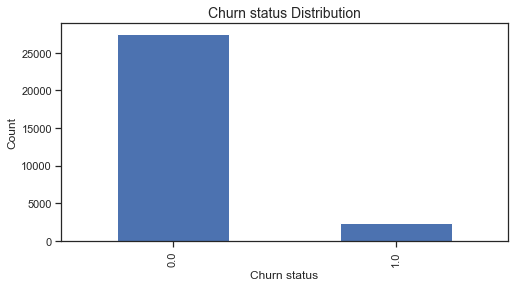

In [44]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline
plt.figure(figsize=(8,4))
df_1['churn_flag'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Churn status')
plt.title('Churn status Distribution',fontsize=14)

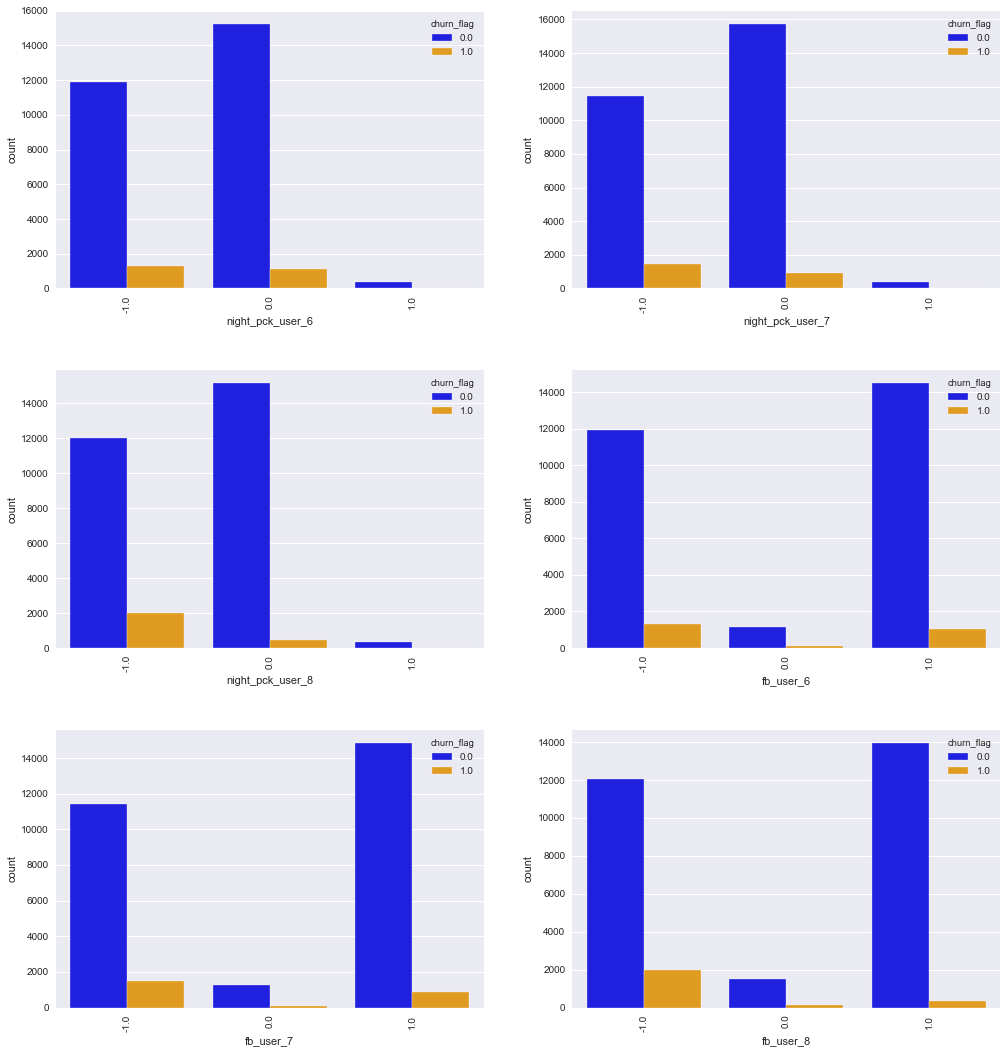

In [61]:
plt.figure(figsize = (15,20))
palette_colors = {0:"BLUE",1: "ORANGE"}
for i in enumerate(categories):
    plt.subplot(4,2,i[0]+1)
    plt.tight_layout(pad=4.0)
    sns.countplot(x=i[1],hue='churn_flag',data=df_1,palette=palette_colors)
    plt.xticks(rotation=90)
plt.show()

In [63]:
id_col = ['mobile_number']
numeric = [column for column in df_1.columns if column not in id_col + categories]
list(enumerate(numeric))

[(0, 'arpu_6'),
 (1, 'arpu_7'),
 (2, 'arpu_8'),
 (3, 'onnet_mou_6'),
 (4, 'onnet_mou_7'),
 (5, 'onnet_mou_8'),
 (6, 'offnet_mou_6'),
 (7, 'offnet_mou_7'),
 (8, 'offnet_mou_8'),
 (9, 'roam_ic_mou_6'),
 (10, 'roam_ic_mou_7'),
 (11, 'roam_ic_mou_8'),
 (12, 'roam_og_mou_6'),
 (13, 'roam_og_mou_7'),
 (14, 'roam_og_mou_8'),
 (15, 'loc_og_t2t_mou_6'),
 (16, 'loc_og_t2t_mou_7'),
 (17, 'loc_og_t2t_mou_8'),
 (18, 'loc_og_t2m_mou_6'),
 (19, 'loc_og_t2m_mou_7'),
 (20, 'loc_og_t2m_mou_8'),
 (21, 'loc_og_t2f_mou_6'),
 (22, 'loc_og_t2f_mou_7'),
 (23, 'loc_og_t2f_mou_8'),
 (24, 'loc_og_t2c_mou_6'),
 (25, 'loc_og_t2c_mou_7'),
 (26, 'loc_og_t2c_mou_8'),
 (27, 'loc_og_mou_6'),
 (28, 'loc_og_mou_7'),
 (29, 'loc_og_mou_8'),
 (30, 'std_og_t2t_mou_6'),
 (31, 'std_og_t2t_mou_7'),
 (32, 'std_og_t2t_mou_8'),
 (33, 'std_og_t2m_mou_6'),
 (34, 'std_og_t2m_mou_7'),
 (35, 'std_og_t2m_mou_8'),
 (36, 'std_og_t2f_mou_6'),
 (37, 'std_og_t2f_mou_7'),
 (38, 'std_og_t2f_mou_8'),
 (39, 'std_og_mou_6'),
 (40, 'std_og_mou_7')

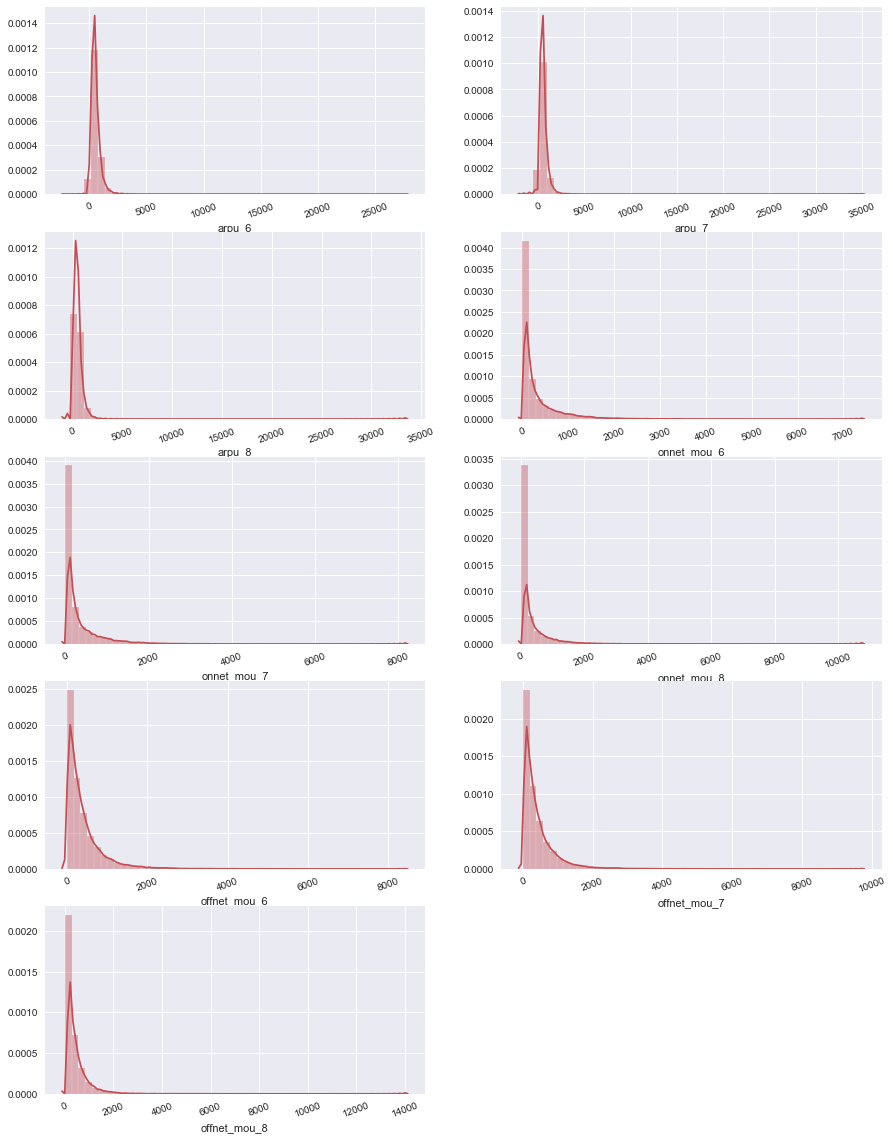

In [79]:
num_df = df_1[['arpu_6','arpu_7','arpu_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8']]
list(enumerate(num_df))
plt.figure(figsize=(15,20))  
for i in enumerate (num_df):
    plt.subplot(5,2,i[0]+1)
    sns.distplot(df_1[i[1]], hist = True , color = 'r')
    plt.xticks(rotation=20)
plt.show()

The above distribution plot show that the variables are skewed towards the left

a) Lets look at the arpu (Average Revenue per user) vs churn rate across three  months

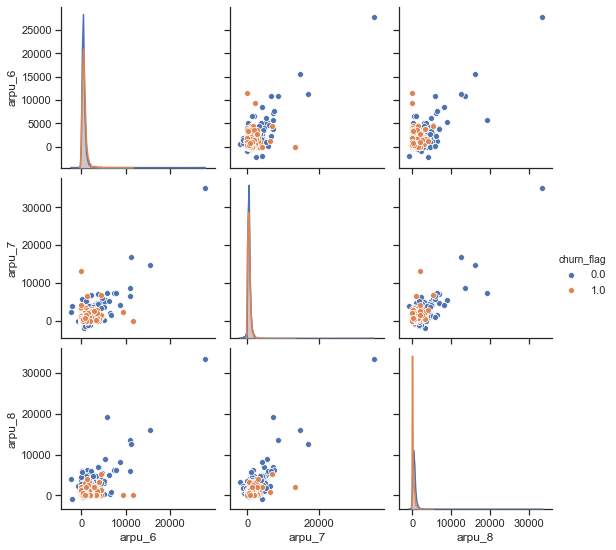

In [45]:
sns.pairplot(data=df_1[['arpu_6','arpu_7','arpu_8','churn_flag']],hue='churn_flag')

 b) onnet_mou (On network/ within the same network usage)

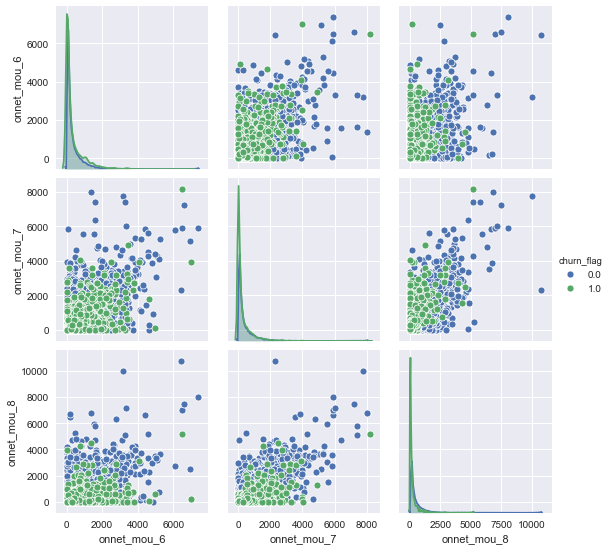

In [81]:
sns.pairplot(data=df_1[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn_flag']],hue='churn_flag')

c) Offnet_mou (Calls outside of the operator network)

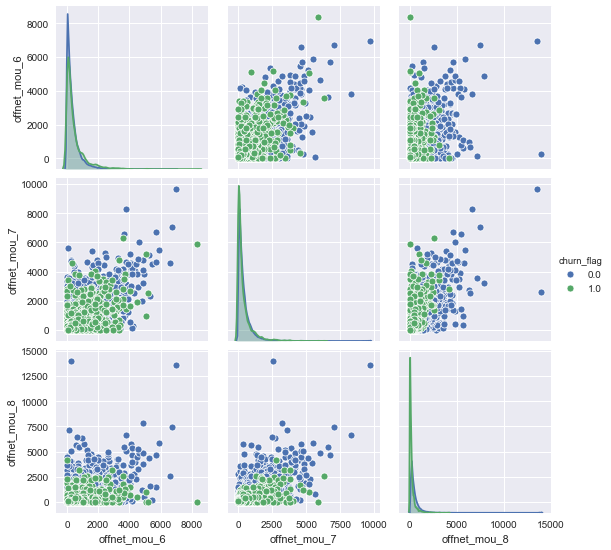

In [82]:
sns.pairplot(data=df_1[['offnet_mou_6','offnet_mou_7','offnet_mou_8','churn_flag']],hue='churn_flag')

d) total_rech_num_
(Number of times a subscriber recharged his mobile)

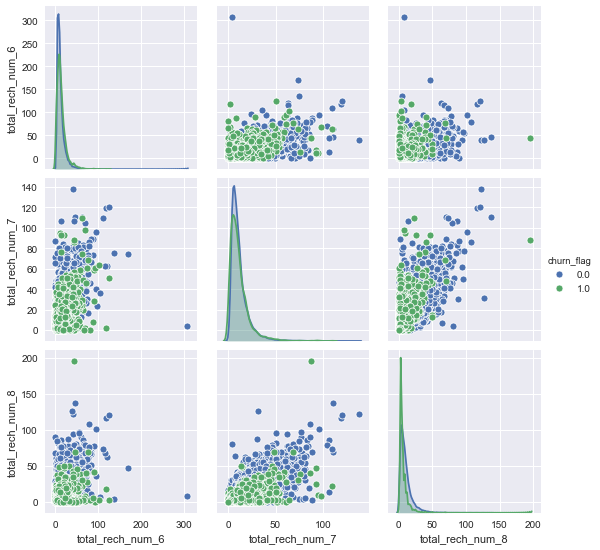

In [84]:
sns.pairplot(data=df_1[['total_rech_num_6','total_rech_num_7','total_rech_num_8','churn_flag']],hue='churn_flag')

In [83]:
joincorr= df_1.corr()
df_1_corr = joincorr.stack().reset_index().sort_values(by = 0, ascending = False)
df_1_corr[((df_1_corr[0] < 1) & (df_1_corr[0] >= 0.4)) | ((df_1_corr[0] <= -0.4) & (df_1_corr[0] > -1))]

,level_0,level_1,0
22315,fb_user_6,night_pck_user_6,0.956578
20035,night_pck_user_6,fb_user_6,0.956578
22469,fb_user_7,night_pck_user_7,0.956280
20189,night_pck_user_7,fb_user_7,0.956280
555,arpu_8,total_rech_amt_8,0.955322
...,...,...,...
22918,aug_vbc_3g,vol_3g_mb_6,0.400669
22922,aug_vbc_3g,arpu_3g_7,0.400310
19274,arpu_3g_7,aug_vbc_3g,0.400310
23220,jun_vbc_3g,av_rech_amt_data_8,0.400038


From the above we can notice high correlation between the variables.  We cannot eliminate as we will lose information good or action month. This could be taken care while running model such as RFE and PCA.

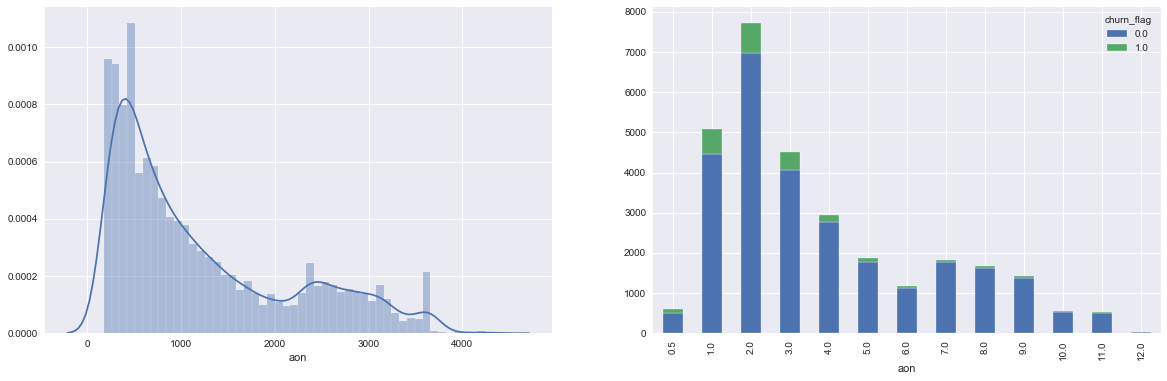

In [90]:

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 6))
sns.distplot(df_1['aon'], ax=ax1)
bins = [0, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
pd.crosstab(pd.cut(round(((df_1['aon']/30)/12),1), bins = bins, labels = labels ), df_1['churn_flag']).plot(kind='bar', stacked=True, ax = ax2)

### Step 4 :  Derived NEW FEATURES 

In [93]:
# Let's create new features from good phase and compare them with action phase

df_1['AVG_arpu_6_7'] = df_1[['arpu_6','arpu_7']].mean(axis=1)
df_1['is_arpu_flag'] = np.where((df_1['arpu_8'] > df_1['AVG_arpu_6_7']), 0, 1)

df_1['AVG_onnet_mou_6_7'] = df_1[['onnet_mou_6','onnet_mou_7']].mean(axis=1)
df_1['is_onnet_mou_flag'] = np.where((df_1['onnet_mou_8'] > df_1['AVG_onnet_mou_6_7']), 0, 1)

df_1['AVG_offnet_mou_6_7'] = df_1[['offnet_mou_6','offnet_mou_7']].mean(axis=1)
df_1['is_offnet_mou_flag'] = np.where((df_1['offnet_mou_8'] > df_1['AVG_offnet_mou_6_7']), 0, 1)

df_1['AVG_roam_ic_mou_6_7'] = df_1[['roam_ic_mou_6','roam_ic_mou_7']].mean(axis=1)
df_1['is_roam_ic_mou_flag'] = np.where((df_1['roam_ic_mou_8'] > df_1['AVG_roam_ic_mou_6_7']), 0, 1)

df_1['AVG_roam_og_mou_6_7'] = df_1[['roam_og_mou_6','roam_og_mou_7']].mean(axis=1)
df_1['is_roam_og_mou_flag'] = np.where((df_1['roam_og_mou_8'] > df_1['AVG_roam_og_mou_6_7']), 0, 1)

df_1['AVG_loc_og_t2t_mou_6_7'] = df_1[['loc_og_t2t_mou_6','loc_og_t2t_mou_7']].mean(axis=1)
df_1['is_loc_og_t2t_mou_flag'] = np.where((df_1['loc_og_t2t_mou_8'] > df_1['AVG_loc_og_t2t_mou_6_7']), 0, 1)

df_1['AVG_loc_og_t2m_mou_6_7'] = df_1[['loc_og_t2m_mou_6','loc_og_t2m_mou_7']].mean(axis=1)
df_1['is_loc_og_t2m_mou_flag'] = np.where((df_1['loc_og_t2m_mou_8'] > df_1['AVG_loc_og_t2m_mou_6_7']), 0, 1)

df_1['AVG_loc_og_t2f_mou_6_7'] = df_1[['loc_og_t2f_mou_6','loc_og_t2f_mou_7']].mean(axis=1)
df_1['is_loc_og_t2f_mou_flag'] = np.where((df_1['loc_og_t2f_mou_8'] > df_1['AVG_loc_og_t2f_mou_6_7']), 0, 1)

df_1['AVG_loc_og_t2c_mou_6_7'] = df_1[['loc_og_t2c_mou_6','loc_og_t2c_mou_7']].mean(axis=1)
df_1['is_loc_og_t2c_mou_flag'] = np.where((df_1['loc_og_t2c_mou_8'] > df_1['AVG_loc_og_t2c_mou_6_7']), 0, 1)

df_1['AVG_std_og_t2t_mou_6_7'] = df_1[['std_og_t2t_mou_6','std_og_t2t_mou_7']].mean(axis=1)
df_1['is_std_og_t2t_mou_flag'] = np.where((df_1['std_og_t2t_mou_8'] > df_1['AVG_std_og_t2t_mou_6_7']), 0, 1)

df_1['AVG_std_og_t2m_mou_6_7'] = df_1[['std_og_t2m_mou_6','std_og_t2m_mou_7']].mean(axis=1)
df_1['is_std_og_t2m_mou_flag'] = np.where((df_1['std_og_t2m_mou_8'] > df_1['AVG_std_og_t2m_mou_6_7']), 0, 1)

df_1['AVG_std_og_t2f_mou_6_7'] = df_1[['std_og_t2f_mou_6','std_og_t2f_mou_7']].mean(axis=1)
df_1['is_std_og_t2f_mou_flag'] = np.where((df_1['std_og_t2f_mou_8'] > df_1['AVG_std_og_t2f_mou_6_7']), 0, 1)

df_1['AVG_isd_og_mou_6_7'] = df_1[['isd_og_mou_6','isd_og_mou_7']].mean(axis=1)
df_1['is_isd_og_mou_flag'] = np.where((df_1['isd_og_mou_8'] > df_1['AVG_isd_og_mou_6_7']), 0, 1)

df_1['AVG_spl_og_mou_6_7'] = df_1[['spl_og_mou_6','spl_og_mou_7']].mean(axis=1)
df_1['is_spl_og_mou_flag'] = np.where((df_1['spl_og_mou_8'] > df_1['AVG_spl_og_mou_6_7']), 0, 1)

df_1['AVG_og_others_6_7'] = df_1[['og_others_6','og_others_7']].mean(axis=1)
df_1['is_og_others_flag'] = np.where((df_1['og_others_8'] > df_1['AVG_og_others_6_7']), 0, 1)


df_1['AVG_loc_ic_t2t_mou_6_7'] = df_1[['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7']].mean(axis=1)
df_1['is_loc_ic_t2t_mou_flag'] = np.where((df_1['loc_ic_t2t_mou_8'] > df_1['AVG_loc_ic_t2t_mou_6_7']), 0, 1)

df_1['AVG_loc_ic_t2m_mou_6_7'] = df_1[['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7']].mean(axis=1)
df_1['is_loc_ic_t2m_mou_flag'] = np.where((df_1['loc_ic_t2m_mou_8'] > df_1['AVG_loc_ic_t2m_mou_6_7']), 0, 1)

df_1['AVG_loc_ic_t2f_mou_6_7'] = df_1[['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7']].mean(axis=1)
df_1['is_loc_ic_t2f_mou_flag'] = np.where((df_1['loc_ic_t2f_mou_8'] > df_1['AVG_loc_ic_t2f_mou_6_7']), 0, 1)

df_1['AVG_std_ic_t2t_mou_6_7'] = df_1[['std_ic_t2t_mou_6','std_ic_t2t_mou_7']].mean(axis=1)
df_1['is_std_ic_t2t_mou_flag'] = np.where((df_1['std_ic_t2t_mou_8'] > df_1['AVG_std_ic_t2t_mou_6_7']), 0, 1)

df_1['AVG_std_ic_t2m_mou_6_7'] = df_1[['std_ic_t2m_mou_6','std_ic_t2m_mou_7']].mean(axis=1)
df_1['is_std_ic_t2m_mou_flag'] = np.where((df_1['std_ic_t2m_mou_8'] > df_1['AVG_std_ic_t2m_mou_6_7']), 0, 1)

df_1['AVG_std_ic_t2f_mou_6_7'] = df_1[['std_ic_t2f_mou_6','std_ic_t2f_mou_7']].mean(axis=1)
df_1['is_std_ic_t2f_mou_flag'] = np.where((df_1['std_ic_t2f_mou_8'] > df_1['AVG_std_ic_t2f_mou_6_7']), 0, 1)

df_1['AVG_spl_ic_mou_6_7'] = df_1[['spl_ic_mou_6','spl_ic_mou_7']].mean(axis=1)
df_1['is_spl_ic_mou_flag'] = np.where((df_1['spl_ic_mou_8'] > df_1['AVG_spl_ic_mou_6_7']), 0, 1)

df_1['AVG_isd_ic_mou_6_7'] = df_1[['isd_ic_mou_6','isd_ic_mou_7']].mean(axis=1)
df_1['is_isd_ic_mou_flag'] = np.where((df_1['isd_ic_mou_8'] > df_1['AVG_isd_ic_mou_6_7']), 0, 1)

df_1['AVG_ic_others_6_7'] = df_1[['ic_others_6','ic_others_7']].mean(axis=1)
df_1['is_ic_others_flag'] = np.where((df_1['ic_others_8'] > df_1['AVG_ic_others_6_7']), 0, 1)

df_1['AVG_total_rech_amt_6_7'] = df_1[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)
df_1['is_total_rech_amt_flag'] = np.where((df_1['total_rech_amt_8'] > df_1['AVG_total_rech_amt_6_7']), 0, 1)

df_1['AVG_vol_2g_mb_6_7'] = df_1[['vol_2g_mb_6','vol_2g_mb_7']].mean(axis=1)
df_1['is_vol_2g_mb_flag'] = np.where((df_1['vol_2g_mb_8'] > df_1['AVG_vol_2g_mb_6_7']), 0, 1)

df_1['AVG_vol_3g_mb_6_7'] = df_1[['vol_3g_mb_6','vol_3g_mb_7']].mean(axis=1)
df_1['is_vol_3g_mb_flag'] = np.where((df_1['vol_3g_mb_8'] > df_1['AVG_vol_3g_mb_6_7']), 0, 1)

df_1['AVG_arpu_3g_6_7'] = df_1[['arpu_3g_6','arpu_3g_7']].mean(axis=1)
df_1['is_arpu_3g_flag'] = np.where((df_1['arpu_3g_8'] > df_1['AVG_arpu_3g_6_7']), 0, 1)

df_1['AVG_arpu_2g_6_7'] = df_1[['arpu_2g_6','arpu_2g_7']].mean(axis=1)
df_1['is_arpu_2g_flag'] = np.where((df_1['arpu_2g_8'] > df_1['AVG_arpu_2g_6_7']), 0, 1)

df_1['AVG_vbc_3g_6_7'] = df_1[['jun_vbc_3g','jul_vbc_3g']].mean(axis=1)
df_1['is_vbc_3g_flag'] = np.where((df_1['aug_vbc_3g'] > df_1['AVG_vbc_3g_6_7']), 0, 1)

df_1['AVG_loc_og_mou_6_7'] = df_1[['loc_og_mou_6','loc_og_mou_7']].mean(axis=1)
df_1['is_loc_og_mou_flag'] = np.where((df_1['loc_og_mou_8'] > df_1['AVG_loc_og_mou_6_7']), 0, 1)

df_1['AVG_std_og_mou_6_7'] = df_1[['std_og_mou_6','std_og_mou_7']].mean(axis=1)
df_1['is_std_og_mou_flag'] = np.where((df_1['std_og_mou_8'] > df_1['AVG_std_og_mou_6_7']), 0, 1)

df_1['AVG_total_og_mou_6_7'] = df_1[['total_og_mou_6','total_og_mou_7']].mean(axis=1)
df_1['is_total_og_mou_flag'] = np.where((df_1['total_og_mou_8'] > df_1['AVG_total_og_mou_6_7']), 0, 1)

df_1['AVG_loc_ic_mou_6_7'] = df_1[['loc_ic_mou_6','loc_ic_mou_7']].mean(axis=1)
df_1['is_loc_ic_mou_flag'] = np.where((df_1['loc_ic_mou_8'] > df_1['AVG_loc_ic_mou_6_7']), 0, 1)

df_1['AVG_std_ic_mou_6_7'] = df_1[['std_ic_mou_6','std_ic_mou_7']].mean(axis=1)
df_1['is_std_ic_mou_flag'] = np.where((df_1['std_ic_mou_8'] > df_1['AVG_std_ic_mou_6_7']), 0, 1)

df_1['AVG_total_ic_mou_6_7'] = df_1[['total_ic_mou_6','total_ic_mou_7']].mean(axis=1)
df_1['is_total_ic_mou_flag'] = np.where((df_1['total_ic_mou_8'] > df_1['AVG_total_ic_mou_6_7']), 0, 1)

df_1['AVG_night_pck_user_6_7'] = df_1[['night_pck_user_6','night_pck_user_7']].mean(axis=1)
df_1['is_night_pck_user_flag'] = np.where((df_1['night_pck_user_8'] > df_1['AVG_night_pck_user_6_7']), 0, 1)

df_1['AVG_monthly_2g_6_7'] = df_1[['monthly_2g_6','monthly_2g_7']].mean(axis=1)
df_1['is_monthly_2g_flag'] = np.where((df_1['monthly_2g_8'] > df_1['AVG_monthly_2g_6_7']), 0, 1)

df_1['AVG_sachet_2g_6_7'] = df_1[['sachet_2g_6','sachet_2g_7']].mean(axis=1)
df_1['is_sachet_2g_flag'] = np.where((df_1['sachet_2g_8'] > df_1['AVG_sachet_2g_6_7']), 0, 1)

df_1['AVG_monthly_3g_6_7'] = df_1[['monthly_3g_6','monthly_3g_7']].mean(axis=1)
df_1['is_monthly_3g_flag'] = np.where((df_1['monthly_3g_8'] > df_1['AVG_monthly_3g_6_7']), 0, 1)

df_1['AVG_sachet_3g_6_7'] = df_1[['sachet_3g_6','sachet_3g_7']].mean(axis=1)
df_1['is_sachet_3g_flag'] = np.where((df_1['sachet_3g_8'] > df_1['AVG_sachet_3g_6_7']), 0, 1)

df_1['AVG_fb_user_6_7'] = df_1[['fb_user_6','fb_user_7']].mean(axis=1)
df_1['is_fb_user_flag'] = np.where((df_1['fb_user_8'] > df_1['AVG_fb_user_6_7']), 0, 1)


In [94]:
# Create month on month change features to understand any risk associated with the churn
df_1['loc_og_t2t_mou_7diff6'] = df_1['loc_og_t2t_mou_7'] - df_1['loc_og_t2t_mou_6']
df_1['loc_og_t2m_mou_7diff6'] = df_1['loc_og_t2m_mou_7'] - df_1['loc_og_t2m_mou_6']
df_1['loc_og_t2f_mou_7diff6'] = df_1['loc_og_t2f_mou_7'] - df_1['loc_og_t2f_mou_6']
df_1['loc_og_t2c_mou_7diff6'] = df_1['loc_og_t2c_mou_7'] - df_1['loc_og_t2c_mou_6']
df_1['loc_og_mou_7diff6'] = df_1['loc_og_mou_7'] - df_1['loc_og_mou_6']
df_1['std_og_t2t_mou_7diff6'] = df_1['std_og_t2t_mou_7'] - df_1['std_og_t2t_mou_6']
df_1['std_og_t2m_mou_7diff6'] = df_1['std_og_t2m_mou_7'] - df_1['std_og_t2m_mou_6']
df_1['std_og_t2f_mou_7diff6'] = df_1['std_og_t2f_mou_7'] - df_1['std_og_t2f_mou_6']
df_1['std_og_mou_7diff6'] = df_1['std_og_mou_7'] - df_1['std_og_mou_6']
df_1['loc_og_mou_7diff6'] = df_1['loc_og_mou_7'] - df_1['loc_og_mou_6']
df_1['std_og_mou_7diff6'] = df_1['std_og_mou_7'] - df_1['std_og_mou_6']
df_1['isd_og_mou_7diff6'] = df_1['isd_og_mou_7'] - df_1['isd_og_mou_6']
df_1['spl_og_mou_7diff6'] = df_1['spl_og_mou_7'] - df_1['spl_og_mou_6']
df_1['og_others_7diff6'] = df_1['og_others_7'] - df_1['og_others_6']
df_1['total_og_mou_7diff6'] = df_1['total_og_mou_7'] - df_1['total_og_mou_6']

df_1['loc_og_t2t_mou_8diff7'] = df_1['loc_og_t2t_mou_8'] - df_1['loc_og_t2t_mou_7']
df_1['loc_og_t2m_mou_8diff7'] = df_1['loc_og_t2m_mou_8'] - df_1['loc_og_t2m_mou_7']
df_1['loc_og_t2f_mou_8diff7'] = df_1['loc_og_t2f_mou_8'] - df_1['loc_og_t2f_mou_7']
df_1['loc_og_t2c_mou_8diff7'] = df_1['loc_og_t2c_mou_8'] - df_1['loc_og_t2c_mou_7']
df_1['loc_og_mou_8diff7'] = df_1['loc_og_mou_8'] - df_1['loc_og_mou_7']
df_1['std_og_t2t_mou_8diff7'] = df_1['std_og_t2t_mou_8'] - df_1['std_og_t2t_mou_7']
df_1['std_og_t2m_mou_8diff7'] = df_1['std_og_t2m_mou_8'] - df_1['std_og_t2m_mou_7']
df_1['std_og_t2f_mou_8diff7'] = df_1['std_og_t2f_mou_8'] - df_1['std_og_t2f_mou_7']
df_1['std_og_mou_8diff7'] = df_1['std_og_mou_8'] - df_1['std_og_mou_7']
df_1['loc_og_mou_8diff7'] = df_1['loc_og_mou_8'] - df_1['loc_og_mou_7']
df_1['std_og_mou_8diff7'] = df_1['std_og_mou_8'] - df_1['std_og_mou_7']
df_1['isd_og_mou_8diff7'] = df_1['isd_og_mou_8'] - df_1['isd_og_mou_7']
df_1['spl_og_mou_8diff7'] = df_1['spl_og_mou_8'] - df_1['spl_og_mou_7']
df_1['og_others_8diff7'] = df_1['og_others_8'] - df_1['og_others_7']
df_1['total_og_mou_8diff7'] = df_1['total_og_mou_8'] - df_1['total_og_mou_7']

df_1['loc_ic_t2t_mou_7diff6'] = df_1['loc_ic_t2t_mou_7'] - df_1['loc_ic_t2t_mou_6']
df_1['loc_ic_t2m_mou_7diff6'] = df_1['loc_ic_t2m_mou_7'] - df_1['loc_ic_t2m_mou_6']
df_1['loc_ic_t2f_mou_7diff6'] = df_1['loc_ic_t2f_mou_7'] - df_1['loc_ic_t2f_mou_6']
df_1['loc_ic_mou_7diff6'] = df_1['loc_ic_mou_7'] - df_1['loc_ic_mou_6']
df_1['std_ic_t2t_mou_7diff6'] = df_1['std_ic_t2t_mou_7'] - df_1['std_ic_t2t_mou_6']
df_1['std_ic_t2m_mou_7diff6'] = df_1['std_ic_t2m_mou_7'] - df_1['std_ic_t2m_mou_6']
df_1['std_ic_t2f_mou_7diff6'] = df_1['std_ic_t2f_mou_7'] - df_1['std_ic_t2f_mou_6']
df_1['std_ic_mou_7diff6'] = df_1['std_ic_mou_7'] - df_1['std_ic_mou_6']
df_1['loc_ic_mou_7diff6'] = df_1['loc_ic_mou_7'] - df_1['loc_ic_mou_6']
df_1['std_ic_mou_7diff6'] = df_1['std_ic_mou_7'] - df_1['std_ic_mou_6']
df_1['spl_ic_mou_7diff6'] = df_1['spl_ic_mou_7'] - df_1['spl_ic_mou_6']
df_1['isd_ic_mou_7diff6'] = df_1['isd_ic_mou_7'] - df_1['isd_ic_mou_6']
df_1['ic_others_7diff6'] = df_1['ic_others_7'] - df_1['ic_others_6']
df_1['total_ic_mou_7diff6'] =df_1['total_ic_mou_7'] - df_1['total_ic_mou_6']

df_1['loc_ic_t2t_mou_8diff7'] = df_1['loc_ic_t2t_mou_8'] - df_1['loc_ic_t2t_mou_7']
df_1['loc_ic_t2m_mou_8diff7'] = df_1['loc_ic_t2m_mou_8'] - df_1['loc_ic_t2m_mou_7']
df_1['loc_ic_t2f_mou_8diff7'] = df_1['loc_ic_t2f_mou_8'] - df_1['loc_ic_t2f_mou_7']
df_1['loc_ic_mou_8diff7'] = df_1['loc_ic_mou_8'] - df['loc_ic_mou_7']
df_1['std_ic_t2t_mou_8diff7'] = df_1['std_ic_t2t_mou_8'] - df_1['std_ic_t2t_mou_7']
df_1['std_ic_t2m_mou_8diff7'] = df_1['std_ic_t2m_mou_8'] - df_1['std_ic_t2m_mou_7']
df_1['std_ic_t2f_mou_8diff7'] = df_1['std_ic_t2f_mou_8'] - df_1['std_ic_t2f_mou_7']
df_1['std_ic_mou_8diff7'] = df_1['std_ic_mou_8'] - df_1['std_ic_mou_7']
df_1['loc_ic_mou_8diff7'] = df_1['loc_ic_mou_8'] - df_1['loc_ic_mou_7']
df_1['std_ic_mou_8diff7'] = df_1['std_ic_mou_8'] - df_1['std_ic_mou_7']
df_1['spl_ic_mou_8diff7'] = df_1['spl_ic_mou_8'] - df_1['spl_ic_mou_7']
df_1['isd_ic_mou_8diff7'] = df_1['isd_ic_mou_8'] - df_1['isd_ic_mou_7']
df_1['ic_others_8diff7'] = df_1['ic_others_8'] - df_1['ic_others_7']
df_1['total_ic_mou_8diff7'] = df_1['total_ic_mou_8'] - df_1['total_ic_mou_7']

df_1['onnet_mou_7diff6'] = df_1['onnet_mou_7'] - df_1['onnet_mou_6']
df_1['onnet_mou_8diff7'] = df_1['onnet_mou_8'] - df_1['onnet_mou_7']

df_1['offnet_mou_7diff6'] = df_1['offnet_mou_7'] - df_1['offnet_mou_6']
df_1['offnet_mou_8diff7'] = df_1['offnet_mou_8'] - df_1['offnet_mou_7']

df_1['roam_ic_mou_7diff6'] = df_1['roam_ic_mou_7'] - df_1['roam_ic_mou_6']
df_1['roam_ic_mou_8diff7'] = df_1['roam_ic_mou_8'] - df_1['roam_ic_mou_7']

df_1['roam_og_mou_7diff6'] = df_1['roam_og_mou_7'] - df_1['roam_og_mou_6']
df_1['roam_og_mou_8diff7'] = df_1['roam_og_mou_8'] - df_1['roam_og_mou_7']

df_1['total_rech_amt_7diff6'] = df_1['total_rech_amt_7'] - df_1['total_rech_amt_6']
df_1['total_rech_amt_8diff7'] = df_1['total_rech_amt_8'] - df_1['total_rech_amt_7']

df_1['vol_2g_mb_7diff6'] = df_1['vol_2g_mb_7'] - df_1['vol_2g_mb_6']
df_1['vol_2g_mb_8diff7'] = df_1['vol_2g_mb_8'] - df_1['vol_2g_mb_7']

df_1['vol_3g_mb_7diff6'] = df_1['vol_3g_mb_7'] - df_1['vol_3g_mb_6']
df_1['vol_3g_mb_8diff7'] = df_1['vol_3g_mb_8'] - df_1['vol_3g_mb_7']

df_1['vbc_3g_7diff6'] = df_1['jul_vbc_3g'] - df_1['jun_vbc_3g']
df_1['vbc_3g_8diff7'] = df_1['aug_vbc_3g'] - df_1['jul_vbc_3g']

In [95]:
df_1.drop(['arpu_6','arpu_7','onnet_mou_6','onnet_mou_7','offnet_mou_6','offnet_mou_7',
         'roam_ic_mou_6','roam_ic_mou_7','roam_og_mou_6','roam_og_mou_7',
         'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2m_mou_6','loc_og_t2m_mou_7',
         'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2c_mou_6','loc_og_t2c_mou_7',
         'std_og_t2t_mou_6','std_og_t2t_mou_7', 'std_og_t2m_mou_6','std_og_t2m_mou_7',
         'std_og_t2f_mou_6','std_og_t2f_mou_7','isd_og_mou_6','isd_og_mou_7',
         'spl_og_mou_6','spl_og_mou_7', 'og_others_6','og_others_7',
         'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7',
         'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7', 'std_ic_t2t_mou_6','std_ic_t2t_mou_7',
         'std_ic_t2m_mou_6','std_ic_t2m_mou_7', 'std_ic_t2f_mou_6','std_ic_t2f_mou_7',
         'spl_ic_mou_6','spl_ic_mou_7', 'isd_ic_mou_6','isd_ic_mou_7',
         'ic_others_6','ic_others_7', 'total_rech_amt_6','total_rech_amt_7',
         'vol_2g_mb_6','vol_2g_mb_7', 'vol_3g_mb_6','vol_3g_mb_7',
         'arpu_3g_6','arpu_3g_7', 'arpu_2g_6','arpu_2g_7',
         'jun_vbc_3g','jul_vbc_3g', 'loc_og_mou_6', 'loc_og_mou_7','std_og_mou_6', 'std_og_mou_7',
          'total_og_mou_6', 'total_og_mou_7','loc_ic_mou_6', 'loc_ic_mou_7',
          'std_ic_mou_6', 'std_ic_mou_7','total_ic_mou_6', 'total_ic_mou_7',
          'total_rech_num_6', 'total_rech_num_7','night_pck_user_6', 'night_pck_user_7',
          'monthly_2g_6', 'monthly_2g_7','sachet_2g_6', 'sachet_2g_7',
          'monthly_3g_6', 'monthly_3g_7','sachet_3g_6', 'sachet_3g_7','fb_user_6', 'fb_user_7'
        ], axis=1, inplace=True)

In [97]:
df_1.shape

(29953, 217)

In [98]:
df_1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29953 entries, 0 to 29952
Data columns (total 217 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   mobile_number           float64
 1   arpu_8                  float64
 2   onnet_mou_8             float64
 3   offnet_mou_8            float64
 4   roam_ic_mou_8           float64
 5   roam_og_mou_8           float64
 6   loc_og_t2t_mou_8        float64
 7   loc_og_t2m_mou_8        float64
 8   loc_og_t2f_mou_8        float64
 9   loc_og_t2c_mou_8        float64
 10  loc_og_mou_8            float64
 11  std_og_t2t_mou_8        float64
 12  std_og_t2m_mou_8        float64
 13  std_og_t2f_mou_8        float64
 14  std_og_mou_8            float64
 15  isd_og_mou_8            float64
 16  spl_og_mou_8            float64
 17  og_others_8             float64
 18  total_og_mou_8          float64
 19  loc_ic_t2t_mou_8        float64
 20  loc_ic_t2m_mou_8        float64
 21  loc_ic_t2f_mou_8        float64
 2

In [99]:
df_1.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aon,aug_vbc_3g,churn_flag,AVG_arpu_6_7,is_arpu_flag,AVG_onnet_mou_6_7,is_onnet_mou_flag,AVG_offnet_mou_6_7,is_offnet_mou_flag,AVG_roam_ic_mou_6_7,is_roam_ic_mou_flag,AVG_roam_og_mou_6_7,is_roam_og_mou_flag,AVG_loc_og_t2t_mou_6_7,is_loc_og_t2t_mou_flag,AVG_loc_og_t2m_mou_6_7,is_loc_og_t2m_mou_flag,AVG_loc_og_t2f_mou_6_7,is_loc_og_t2f_mou_flag,AVG_loc_og_t2c_mou_6_7,is_loc_og_t2c_mou_flag,AVG_std_og_t2t_mou_6_7,is_std_og_t2t_mou_flag,AVG_std_og_t2m_mou_6_7,is_std_og_t2m_mou_flag,AVG_std_og_t2f_mou_6_7,is_std_og_t2f_mou_flag,AVG_isd_og_mou_6_7,is_isd_og_mou_flag,AVG_spl_og_mou_6_7,is_spl_og_mou_flag,AVG_og_others_6_7,is_og_others_flag,AVG_loc_ic_t2t_mou_6_7,is_loc_ic_t2t_mou_flag,AVG_loc_ic_t2m_mou_6_7,is_loc_ic_t2m_mou_flag,AVG_loc_ic_t2f_mou_6_7,is_loc_ic_t2f_mou_flag,AVG_std_ic_t2t_mou_6_7,is_std_ic_t2t_mou_flag,AVG_std_ic_t2m_mou_6_7,is_std_ic_t2m_mou_flag,AVG_std_ic_t2f_mou_6_7,is_std_ic_t2f_mou_flag,AVG_isd_ic_mou_6_7,AVG_spl_ic_mou_6_7,is_spl_ic_mou_flag,is_isd_ic_mou_flag,AVG_ic_others_6_7,is_ic_others_flag,AVG_total_rech_amt_6_7,is_total_rech_amt_flag,AVG_vol_2g_mb_6_7,is_vol_2g_mb_flag,AVG_vol_3g_mb_6_7,is_vol_3g_mb_flag,AVG_arpu_3g_6_7,is_arpu_3g_flag,AVG_arpu_2g_6_7,is_arpu_2g_flag,AVG_vbc_3g_6_7,is_vbc_3g_flag,AVG_loc_og_mou_6_7,is_loc_og_mou_flag,AVG_std_og_mou_6_7,is_std_og_mou_flag,AVG_total_og_mou_6_7,is_total_og_mou_flag,AVG_loc_ic_mou_6_7,is_loc_ic_mou_flag,AVG_std_ic_mou_6_7,is_std_ic_mou_flag,AVG_total_ic_mou_6_7,is_total_ic_mou_flag,AVG_night_pck_user_6_7,is_night_pck_user_flag,AVG_monthly_2g_6_7,is_monthly_2g_flag,AVG_sachet_2g_6_7,is_sachet_2g_flag,AVG_monthly_3g_6_7,is_monthly_3g_flag,AVG_sachet_3g_6_7,is_sachet_3g_flag,AVG_fb_user_6_7,is_fb_user_flag,loc_og_t2t_mou_7diff6,loc_og_t2m_mou_7diff6,loc_og_t2f_mou_7diff6,loc_og_t2c_mou_7diff6,loc_og_mou_7diff6,std_og_t2t_mou_7diff6,std_og_t2m_mou_7diff6,std_og_t2f_mou_7diff6,std_og_mou_7diff6,isd_og_mou_7diff6,spl_og_mou_7diff6,og_others_7diff6,total_og_mou_7diff6,loc_og_t2t_mou_8diff7,loc_og_t2m_mou_8diff7,loc_og_t2f_mou_8diff7,loc_og_t2c_mou_8diff7,loc_og_mou_8diff7,std_og_t2t_mou_8diff7,std_og_t2m_mou_8diff7,std_og_t2f_mou_8diff7,std_og_mou_8diff7,isd_og_mou_8diff7,spl_og_mou_8diff7,og_others_8diff7,total_og_mou_8diff7,loc_ic_t2t_mou_7diff6,loc_ic_t2m_mou_7diff6,loc_ic_t2f_mou_7diff6,loc_ic_mou_7diff6,std_ic_t2t_mou_7diff6,std_ic_t2m_mou_7diff6,std_ic_t2f_mou_7diff6,std_ic_mou_7diff6,spl_ic_mou_7diff6,isd_ic_mou_7diff6,ic_others_7diff6,total_ic_mou_7diff6,loc_ic_t2t_mou_8diff7,loc_ic_t2m_mou_8diff7,loc_ic_t2f_mou_8diff7,loc_ic_mou_8diff7,std_ic_t2t_mou_8diff7,std_ic_t2m_mou_8diff7,std_ic_t2f_mou_8diff7,std_ic_mou_8diff7,spl_ic_mou_8diff7,isd_ic_mou_8diff7,ic_others_8diff7,total_ic_mou_8diff7,onnet_mou_7diff6,onnet_mou_8diff7,offnet_mou_7diff6,offnet_mou_8diff7,roam_ic_mou_7diff6,roam_ic_mou_8diff7,roam_og_mou_7diff6,roam_og_mou_8diff7,total_rech_amt_7diff6,total_rech_amt_8diff7,vol_2g_mb_7diff6,vol_2g_mb_8diff7,vol_3g_mb_7diff6,vol_3g_mb_8diff7,vbc_3g_7diff6,vbc_3g_8diff7
0,7.000843e+09,213.803,0.00,0.00,0.00,

In [103]:

df_1.drop(columns = list(df.select_dtypes(include=['category']).columns), axis = 1, inplace = True)

In [104]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 233 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [105]:
df_1.shape

(29953, 217)

### Step 6  : Model Building

In [107]:
X = df_1[df_1.columns[~df_1.columns.isin(['churn_flag'])]]
Y = df_1['churn_flag']

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [109]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std,Y, train_size=0.8,test_size=0.2,random_state=50)

In [110]:
print("Training dataset size",X_train.shape)
print("Training dataset target size",y_train.shape)
print("Test dataset size",X_test.shape)
print("Test dataset target size",y_test.shape)

Training dataset size (23962, 216)
Training dataset target size (23962,)
Test dataset size (5991, 216)
Test dataset target size (5991,)


1. PRINCIPAL COMPONENT ANALYSIS

In [111]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_train)
pca.components_

array([[ 2.85816547e-03,  3.80224588e-02, -6.33535828e-02, ...,
         1.71438791e-02,  1.79996707e-02,  3.38774890e-03],
       [ 2.05111435e-02,  2.00668478e-01,  1.36226819e-01, ...,
         2.47484132e-02,  1.99807340e-05,  1.57313335e-02],
       [ 1.79581234e-02,  1.59345091e-02, -2.82497033e-02, ...,
        -1.74643629e-02,  1.48036889e-03, -1.79045039e-02],
       ...,
       [-0.00000000e+00,  4.65979483e-16, -6.79561380e-03, ...,
        -6.78258466e-03,  2.48898792e-02,  4.76962881e-02],
       [-0.00000000e+00,  1.41289705e-16, -1.04615359e-01, ...,
        -1.09198001e-02, -3.85313767e-03, -7.38373870e-03],
       [ 0.00000000e+00,  5.80824149e-16, -2.54450847e-02, ...,
         2.28896184e-02, -2.09125956e-02, -4.00746496e-02]])

In [112]:
pca.explained_variance_ratio_

array([6.83298376e-02, 5.87456745e-02, 4.46551275e-02, 3.55526059e-02,
       3.02059082e-02, 2.61724571e-02, 2.01809829e-02, 1.99963392e-02,
       1.86726338e-02, 1.67187173e-02, 1.66265800e-02, 1.53598604e-02,
       1.50397190e-02, 1.42014122e-02, 1.35362973e-02, 1.33862276e-02,
       1.29105779e-02, 1.23955259e-02, 1.18924397e-02, 1.17576112e-02,
       1.15164356e-02, 1.11670870e-02, 1.09922411e-02, 1.06860932e-02,
       1.05157008e-02, 1.02804252e-02, 1.01523535e-02, 9.88651856e-03,
       9.40703722e-03, 9.22294769e-03, 9.09629931e-03, 8.51927750e-03,
       8.44539125e-03, 8.20070657e-03, 8.02710447e-03, 7.86343415e-03,
       7.77397050e-03, 7.60941418e-03, 7.56951993e-03, 7.41119923e-03,
       7.36095103e-03, 7.21288080e-03, 7.15868436e-03, 6.92734434e-03,
       6.83676728e-03, 6.68110774e-03, 6.47663316e-03, 6.39375483e-03,
       6.28930391e-03, 6.25798349e-03, 6.12130011e-03, 6.11216346e-03,
       5.96551382e-03, 5.76453228e-03, 5.69059468e-03, 5.60508951e-03,
      

In [113]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

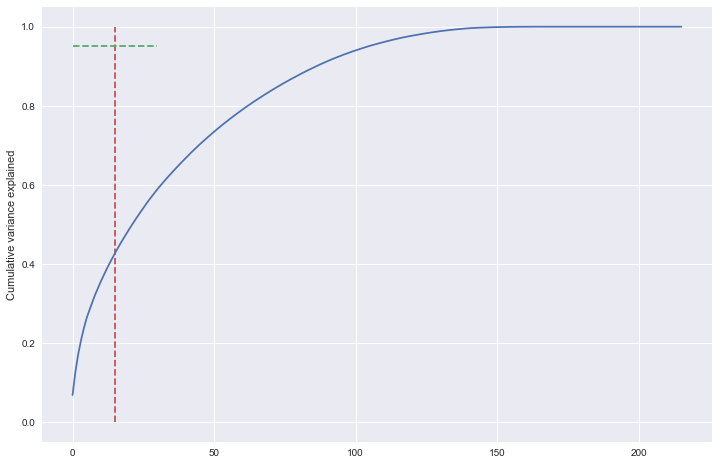

In [114]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [115]:
from sklearn.decomposition import IncrementalPCA

In [116]:
pca_final = IncrementalPCA(n_components=16)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(23962, 16)

In [117]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [118]:
corrmat.shape

(16, 16)

In [119]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(5991, 16)

### Applying logistic regression on the data on our Principal components

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [127]:
learner_pca = LogisticRegression(class_weight = 'balanced')

In [128]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [129]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [130]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.86'

 Thus, here we used 16 components, which could nearly explain 88% variance in dataset
- We were able to achieve 86% Area under the curve on the test set

Let's build couple of more model with different number of components. Let's see if the results changes

In [ ]:
pca_last2 = PCA(n_components=15)
df_train_pca2 = pca_last2.fit_transform(X_train)
df_test_pca2 = pca_last2.transform(X_test)
df_test_pca2.shap

In [141]:
pca_final2 = IncrementalPCA(n_components=12)
df_train_pca2 = pca_final2.fit_transform(X_train)
df_test_pca2 = pca_final2.transform(X_test)
df_train_pca2.shape

(23962, 12)

In [142]:
#training the regression model
learner_pca2 = LogisticRegression(class_weight = 'balanced')
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)
#Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.86'

### Applying the random forest to the pricincipal components

In [146]:
from sklearn.ensemble import RandomForestClassifier
RFC_balanced = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,
                                      min_samples_split=500, min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, max_features='auto', 
                                      max_leaf_nodes=None, min_impurity_split=1e-07,
                                      bootstrap=True, oob_score=False, n_jobs=-1, 
                                      random_state=9999, verbose=0, warm_start=False, 
                                      class_weight="balanced_subsample")

In [147]:
TrainedRFC= RFC_balanced.fit(df_train_pca,y_train)

              precision    recall  f1-score   support

         0.0       0.98      0.83      0.90      5502
         1.0       0.29      0.78      0.42       489

    accuracy                           0.83      5991
   macro avg       0.63      0.81      0.66      5991
weighted avg       0.92      0.83      0.86      5991

Accuracy for the test dataset 82.7%
ROC for the test dataset 86.6%


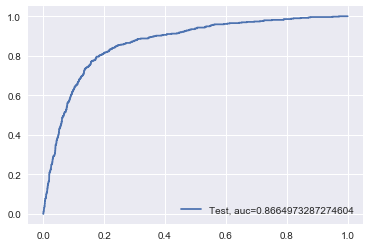

In [149]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
preds_RFC=TrainedRFC.predict(df_test_pca)
preds_probs_RFC=TrainedRFC.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_RFC))
accuracy = metrics.accuracy_score(y_test, preds_RFC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

### Applying Gradient Boosting to the principal components

In [150]:
from sklearn import ensemble

# Fit classifier with out-of-bag estimates
params = {'n_estimators': 200, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 10, 'random_state': 9999}
GBC = ensemble.GradientBoostingClassifier(**params)

In [151]:
GBC.fit(df_train_pca,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=10, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=9999, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      5502
         1.0       0.52      0.02      0.04       489

    accuracy                           0.92      5991
   macro avg       0.72      0.51      0.50      5991
weighted avg       0.89      0.92      0.88      5991

Accuracy for the test dataset 91.9%
ROC for the test dataset 86.0%


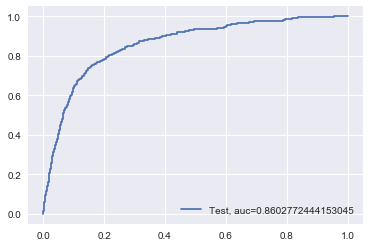

In [152]:
preds_GBC = GBC.predict(df_test_pca)
preds_probs_GBC = GBC.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_GBC))
accuracy = metrics.accuracy_score(y_test, preds_GBC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy))

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_GBC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

### Gradient Boosting with Hyperparameter tuning :
#### Change in estimators & max_depth

In [154]:
from sklearn.model_selection import GridSearchCV   #Perforing grid search

# Fit classifier with out-of-bag estimates
param_test = {'n_estimators':range(200,500,100), 'max_depth':range(5,8,1)}

gsearch1 = GridSearchCV(
    estimator = ensemble.GradientBoostingClassifier(
        learning_rate=0.05,
        min_samples_split=20,
        min_samples_leaf=10,
        subsample=0.1,
        random_state=9999,verbose = 2,), param_grid = param_test, scoring='roc_auc',n_jobs=-1,iid=False, cv=None,verbose=2)


In [155]:
gsearch1.fit(df_train_pca,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.9min finished


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.4962           0.0190            3.11s
         2           0.5153           0.0159            5.23s
         3           0.4764           0.0124            5.11s
         4           0.4670           0.0103            4.89s
         5           0.4995           0.0096            4.63s
         6           0.4571           0.0076            4.34s
         7           0.4600           0.0067            4.13s
         8           0.4479           0.0052            3.97s
         9           0.4479           0.0052            4.18s
        10           0.4930           0.0051            4.23s
        11           0.4607           0.0043            4.22s
        12           0.4276           0.0042            4.32s
        13           0.4591           0.0035            4.32s
        14           0.3993           0.0031            4.38s
        15           0.4198           0.0039            4.33s
       

       137           0.3445          -0.0000            1.45s
       138           0.3154          -0.0002            1.43s
       139           0.3700          -0.0000            1.41s
       140           0.3571          -0.0002            1.39s
       141           0.3650          -0.0002            1.37s
       142           0.3541          -0.0002            1.35s
       143           0.3449           0.0000            1.33s
       144           0.3463          -0.0001            1.31s
       145           0.3584           0.0003            1.30s
       146           0.3500          -0.0001            1.27s
       147           0.3534           0.0001            1.25s
       148           0.3631          -0.0002            1.23s
       149           0.3421           0.0000            1.21s
       150           0.3158          -0.0000            1.19s
       151           0.3631           0.0001            1.17s
       152           0.3285          -0.0003            1.15s
       1

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.05,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=10,
                                                  min_samples_split=20,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
   

In [156]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 5, 'n_estimators': 200}, 0.8726516722523711)

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      5502
         1.0       0.53      0.26      0.35       489

    accuracy                           0.92      5991
   macro avg       0.73      0.62      0.65      5991
weighted avg       0.90      0.92      0.91      5991

Accuracy for the test dataset 92.1%
ROC for the test dataset 88.2%


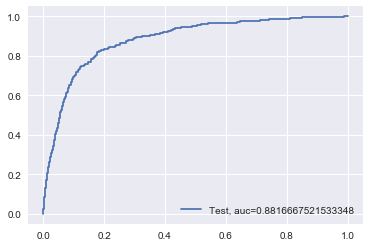

In [157]:
preds_GBC_HT = gsearch1.predict(df_test_pca)
preds_GBC_probs_HT = gsearch1.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_GBC_HT))
accuracy = metrics.accuracy_score(y_test, preds_GBC_HT)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_GBC_probs_HT)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

#### Change in min_samples_leaf

In [158]:
param_test = {'min_samples_leaf': range(10,100,20)}

gsearch1 = GridSearchCV(
    estimator = ensemble.GradientBoostingClassifier(
        n_estimators = 100,
        learning_rate=0.05,
        max_depth = 5,
        min_samples_split=100,
        subsample=0.1,
        random_state=9999,verbose = 2,), param_grid = param_test, scoring='roc_auc',n_jobs=-1,iid=False, cv=None,verbose=2)


In [159]:
gsearch1.fit(df_train_pca,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    8.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    9.4s finished


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5089           0.0170            2.02s
         2           0.5292           0.0152            2.08s
         3           0.4881           0.0111            2.01s
         4           0.4773           0.0101            2.05s
         5           0.5119           0.0092            2.02s
         6           0.4692           0.0078            2.00s
         7           0.4717           0.0071            1.84s
         8           0.4566           0.0043            1.78s
         9           0.4540           0.0058            1.72s
        10           0.5070           0.0047            1.86s
        11           0.4741           0.0050            1.85s
        12           0.4386           0.0045            1.88s
        13           0.4707           0.0031            1.87s
        14           0.4157           0.0029            1.87s
        15           0.4345           0.0036            1.86s
       

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.05,
                                                  loss='deviance', max_depth=5,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=100,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
   

In [160]:
gsearch1.best_params_, gsearch1.best_score_

({'min_samples_leaf': 50}, 0.8741729729742916)

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      5502
         1.0       0.48      0.22      0.30       489

    accuracy                           0.92      5991
   macro avg       0.71      0.60      0.63      5991
weighted avg       0.90      0.92      0.90      5991

Accuracy for the test dataset 91.7%
ROC for the test dataset 88.0%


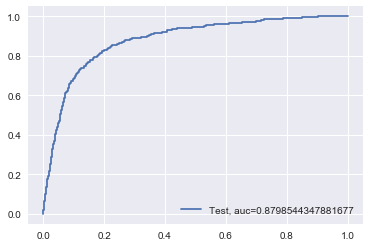

In [161]:
preds_GBC_HT = gsearch1.predict(df_test_pca)
preds_GBC_probs_HT = gsearch1.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_GBC_HT))
accuracy = metrics.accuracy_score(y_test, preds_GBC_HT)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_GBC_probs_HT)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

## Model for extracting the feature importance : Interpretability

In [165]:
from sklearn.ensemble import RandomForestClassifier

RF2=RandomForestClassifier(max_features=94, n_estimators=200, criterion= 'entropy', max_depth=15,random_state=111, class_weight='balanced')
RF2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features=94,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=111,
                       verbose=0, warm_start=False)

In [169]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RF2, X_train, y_train, scoring = 'roc_auc')
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.91965939 0.94120384 0.94202143 0.91878609 0.93333098]
Mean: 0.9310003450837987
Standard Deviation: 0.01008774123430209


In [171]:
predictions_train = RF2.predict(X_train)
print(classification_report(y_train, predictions_train))
predictions = RF2.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     22018
         1.0       0.89      1.00      0.94      1944

    accuracy                           0.99     23962
   macro avg       0.95      0.99      0.97     23962
weighted avg       0.99      0.99      0.99     23962

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      5502
         1.0       0.64      0.57      0.60       489

    accuracy                           0.94      5991
   macro avg       0.80      0.77      0.78      5991
weighted avg       0.94      0.94      0.94      5991



In [174]:
importances = RF2.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

,colName,value
0,0.163139,total_ic_mou_8
1,0.071873,total_og_mou_8
2,0.052572,last_day_rch_amt_8
3,0.040823,total_rech_amt_8
4,0.029889,roam_og_mou_8
5,0.027133,total_rech_amt_8diff7
6,0.021742,total_og_mou_8diff7
7,0.020468,av_rech_amt_data_8
8,0.019503,arpu_8
9,0.015144,loc_ic_mou_8


### Conclusion 

Different machine learning models have been used  to solve telecom chuen classification problem 
- With PCA, Gradient Boosting performed the best when hypertuned  when compared with other models.
- Further , we consider  F1-score and Area under the curve as the primary metrics for the evaluation 

Interpretation for the business 
- The above analysis clearly indicates that the call related incoming & outgoing within a circle is key for identifying churn customers
- Further when the recharge amount shows a dip in the action phase , it clearly indicates that a persion is going to churn
- Age on network is also a key indicator for identifying the churn, if aon is less than 500 days and their usage is reduce then the customer is going to be churned
- The usage of mobile data has also reduced when compared with 7th month. So, data usage & amount can also be the other features for understanding the churn behavior